In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import matplotlib as plt

In [2]:
#login to twitter 

PATH = "C:/Users/hp/Downloads/edgedriver_win64/msedgedriver.exe"
driver = webdriver.Edge(PATH)

url="https://twitter.com/search?q=%23palestine&src=typed_query&f=top"
driver.get(url)

# Setup the log in
sleep(3)
username = driver.find_element(By.XPATH,"//input[@name='text']")
username.send_keys("jadir99")
next_button = driver.find_element(By.XPATH,"//span[contains(text(),'Next')]")
next_button.click()

sleep(3)
password = driver.find_element(By.XPATH,"//input[@name='password']")
password.send_keys('jadir99jadir99')
log_in = driver.find_element(By.XPATH,"//span[contains(text(),'Log in')]")
log_in.click()

C:\Users\hp\AppData\Local\Temp\ipykernel_7428\2398914636.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge(PATH)


In [ ]:

UserTags = []
TimeStamps = []
Tweets = []
Replys = []
reTweets = []
Likes = []

start_time = time.time()  # Get the start time

while len(UserTags)<=900:
    
    # Find all the tweet article elements on the page
    articles = driver.find_elements(By.XPATH, "//article[@data-testid='tweet']")
    # Extract data from each article
    for article in articles:
        try:
            if(article.find_element(By.XPATH, ".//span[@class='css-1qaijid r-bcqeeo r-qvutc0 r-poiln3']")):
                UserTag = article.find_element(By.XPATH, ".//span[@class='css-1qaijid r-bcqeeo r-qvutc0 r-poiln3']").text
                if UserTag not in UserTags and UserTag is not None:
                    UserTags.append(UserTag)
            if(article.find_element(By.XPATH, ".//time")):
                TimeStamp = article.find_element(By.XPATH, ".//time").get_attribute('datetime')
                if TimeStamp not in TimeStamps and TimeStamp is not None:
                    TimeStamps.append(TimeStamp)
            if(article.find_element(By.XPATH, ".//time")):
                Tweet = article.find_element(By.XPATH, ".//div[@data-testid='tweetText']").text
                if Tweet not in Tweets and Tweet is not None:
                    Tweets.append(Tweet)
        except NoSuchElementException:
            continue        
        except StaleElementReferenceException:
            continue

    # Scroll down to the bottom of the page
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    time.sleep(3)  # Wait for the page to load more articles


KeyboardInterrupt: 

## save data 

In [ ]:
df = pd.DataFrame(zip(UserTags,TimeStamps,Tweets)
                  ,columns=['UserTags','time','Tweets'])
df.to_csv(r"tweets.csv", index=False)
# del UserTags
# del TimeStamps
# del Tweets 
df.head()
print(df.shape[0])

56


### la partie de cleaning data 

In [149]:
# load data :
# df=pd.read_csv("tweets.csv")
df=pd.read_excel("test.xlsx")
df.head()
# print(df.shape[0])

,UserTags,time,Tweets
0,The protector ISLAM,2024-04-18T12:56:29.000Z,India and Israel on the tip of our shoes\n#اله...
1,Aisha,2024-04-18T12:35:52.000Z,The people of Kashmir and Palestine look to us...
2,انتخاب شده,2024-04-18T08:44:18.000Z,Breaking \n\nMissile attack on Israeli bases ...
3,Jake Foacta,2024-04-18T12:42:37.000Z,Israeli forces arrest an Islamic State #ISIS o...
4,𝔼𝕒𝕣𝕝𝕪 𝔹𝕚𝕣𝕕,2024-04-18T12:02:50.000Z,Those who are mute & enjoying life in Pakistan...


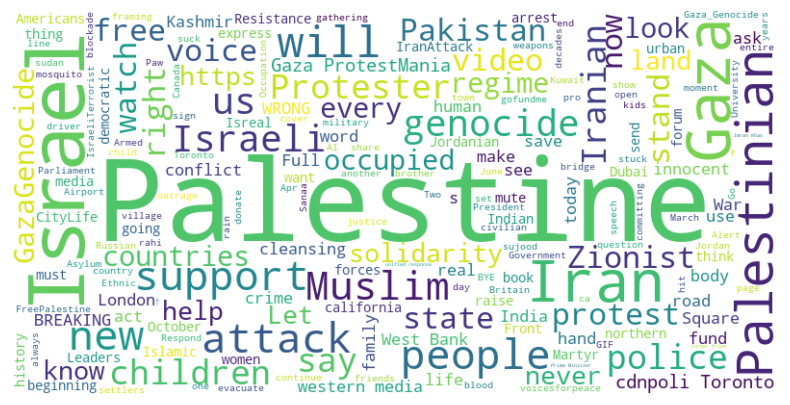

In [131]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Votre code ici
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Tweets'].values))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### makethe data in lowercase 

In [150]:
import string 
df['Tweets']=df['Tweets'].str.lower()
df['UserTags']=df['UserTags'].str.lower()
df.head()

,UserTags,time,Tweets
0,the protector islam,2024-04-18T12:56:29.000Z,india and israel on the tip of our shoes\n#اله...
1,aisha,2024-04-18T12:35:52.000Z,the people of kashmir and palestine look to us...
2,انتخاب شده,2024-04-18T08:44:18.000Z,breaking \n\nmissile attack on israeli bases ...
3,jake foacta,2024-04-18T12:42:37.000Z,israeli forces arrest an islamic state #isis o...
4,𝔼𝕒𝕣𝕝𝕪 𝔹𝕚𝕣𝕕,2024-04-18T12:02:50.000Z,those who are mute & enjoying life in pakistan...


### contractions

In [151]:
import contractions 
def replace_contractions(text):
    return contractions.fix(text)
replace_contractions("don't")

'do not'

In [152]:
#applicate the contraction in dataframe format

df['Tweets']=df['Tweets'].apply(lambda x:replace_contractions(x))
df.head()

,UserTags,time,Tweets
0,the protector islam,2024-04-18T12:56:29.000Z,india and israel on the tip of our shoes\n#اله...
1,aisha,2024-04-18T12:35:52.000Z,the people of kashmir and palestine look to us...
2,انتخاب شده,2024-04-18T08:44:18.000Z,breaking \n\nmissile attack on israeli bases ...
3,jake foacta,2024-04-18T12:42:37.000Z,israeli forces arrest an islamic state #isis o...
4,𝔼𝕒𝕣𝕝𝕪 𝔹𝕚𝕣𝕕,2024-04-18T12:02:50.000Z,those who are mute & enjoying life in pakistan...


### remove hashtags and urls 

In [153]:
import re
# remove hashtags and mentions in text:
def remove_hashtags_mentions_URLS(text):
    without_hashtag=re.sub(r'#\S*','',text)
    without_mentions =re.sub(r'@\S*','',without_hashtag)
    return re.sub(r'https?://\S+','',without_mentions)

In [154]:
#applicate the function in the dataframe
df['Tweets']=df['Tweets'].apply(lambda x:remove_hashtags_mentions_URLS(x))
df['UserTags']=df['UserTags'].apply(lambda x:remove_hashtags_mentions_URLS(x))
df.head()

,UserTags,time,Tweets
0,the protector islam,2024-04-18T12:56:29.000Z,india and israel on the tip of our shoes\n \n...
1,aisha,2024-04-18T12:35:52.000Z,the people of kashmir and palestine look to us...
2,انتخاب شده,2024-04-18T08:44:18.000Z,breaking \n\nmissile attack on israeli bases ...
3,jake foacta,2024-04-18T12:42:37.000Z,israeli forces arrest an islamic state operat...
4,𝔼𝕒𝕣𝕝𝕪 𝔹𝕚𝕣𝕕,2024-04-18T12:02:50.000Z,those who are mute & enjoying life in pakistan...


#### remove punctuation 

In [155]:
def removePunctuation(text):
    clean_words = [''.join(char for char in word if char not in string.punctuation) for word in text]
    return''.join(clean_words)
# test la fonction and applicate it 

In [156]:
df['Tweets']=df['Tweets'].apply(lambda x:removePunctuation(x))
df['UserTags']=df['UserTags'].apply(lambda x:removePunctuation(x))
df.head()

,UserTags,time,Tweets
0,the protector islam,2024-04-18T12:56:29.000Z,india and israel on the tip of our shoes\n \n...
1,aisha,2024-04-18T12:35:52.000Z,the people of kashmir and palestine look to us...
2,انتخاب شده,2024-04-18T08:44:18.000Z,breaking \n\nmissile attack on israeli bases ...
3,jake foacta,2024-04-18T12:42:37.000Z,israeli forces arrest an islamic state operat...
4,𝔼𝕒𝕣𝕝𝕪 𝔹𝕚𝕣𝕕,2024-04-18T12:02:50.000Z,those who are mute enjoying life in pakistan ...


### remove stop words 

In [157]:
 #function to remove all stop words :
ang=stopwords.words('english')
fr=stopwords.words('french')
arabe=stopwords.words('arabic')
def remove_stopWords(text):
    # clean from stopword
    return ' '.join([word for word in text.split() if word not in ang])  
print(remove_stopWords("jadir i am you are we not have and enaugh"))

jadir enaugh


In [158]:
# aplicate the funtion remove_stopWords in dataframe 
df['Tweets']=df['Tweets'].apply(lambda x:remove_stopWords(x))
df['UserTags']=df['UserTags'].apply(lambda x:remove_stopWords(x))
df.head()

,UserTags,time,Tweets
0,protector islam,2024-04-18T12:56:29.000Z,india israel tip shoes
1,aisha,2024-04-18T12:35:52.000Z,people kashmir palestine look us want see unif...
2,انتخاب شده,2024-04-18T08:44:18.000Z,breaking missile attack israeli bases northern...
3,jake foacta,2024-04-18T12:42:37.000Z,israeli forces arrest islamic state operative ...
4,𝔼𝕒𝕣𝕝𝕪 𝔹𝕚𝕣𝕕,2024-04-18T12:02:50.000Z,mute enjoying life pakistan think issue headac...


### steeming

In [159]:
#steeming verbs en inf 
from nltk.stem import SnowballStemmer
def stemming(text):
    eng=SnowballStemmer("english")
    return ' '.join([eng.stem(word) for word in text.split()])
# print(eng)
result = stemming("dogs  available   u eating")
result


'dog avail u eat'

In [160]:
# applaying this function in the datframe 
df['Tweets']=df['Tweets'].apply(lambda x:stemming(x))
df.head()

,UserTags,time,Tweets
0,protector islam,2024-04-18T12:56:29.000Z,india israel tip shoe
1,aisha,2024-04-18T12:35:52.000Z,peopl kashmir palestin look us want see unifi ...
2,انتخاب شده,2024-04-18T08:44:18.000Z,break missil attack isra base northern occupi ...
3,jake foacta,2024-04-18T12:42:37.000Z,isra forc arrest islam state oper west bank im...
4,𝔼𝕒𝕣𝕝𝕪 𝔹𝕚𝕣𝕕,2024-04-18T12:02:50.000Z,mute enjoy life pakistan think issu headach ra...


### lematization 

In [161]:
#lematization 
from nltk import WordNetLemmatizer 
l=  WordNetLemmatizer()
def lemmatizer(text):
    return l.lemmatize(text) 
# lemmatizer("jurong point crazi avail bugi n great world la u mean me  e buffet cine got amor wat")

### correction des fauts d'ortographe 

In [162]:
from spellchecker import SpellChecker
S=SpellChecker()
def correct_spellings(text):
    return ' '.join([S.correction(word )for word in text.split()])
print(correct_spellings("jurong point crazi avail bugi n great world la e buffet cine got amor wat	"))

wrong point crazy avail bug n great world la e buffet cine got armor wat


In [166]:
# save the modification 
df.to_csv(r"clear_tweets.csv", index=False)
df.to_excel(r"clear_tweets.xlsx", index=False)
df.head()

,UserTags,time,Tweets,sentiments
0,protector islam,2024-04-18T12:56:29.000Z,india israel tip shoe,neutral
1,aisha,2024-04-18T12:35:52.000Z,peopl kashmir palestin look us want see unifi ...,positive
2,انتخاب شده,2024-04-18T08:44:18.000Z,break missil attack isra base northern occupi ...,negative
3,jake foacta,2024-04-18T12:42:37.000Z,isra forc arrest islam state oper west bank im...,negative
4,𝔼𝕒𝕣𝕝𝕪 𝔹𝕚𝕣𝕕,2024-04-18T12:02:50.000Z,mute enjoy life pakistan think issu headach ra...,positive


In [164]:
from textblob import TextBlob
negative=[]
neutral=[]
positive=[]
# analyse the sentiment :
def get_tweet_sentiment(tweet):
        # create TextBlob object of passed tweet text
        analysis = TextBlob(tweet)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            # positive.append
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
sentiments=[]
for tweet in df['Tweets']:
     sentiments.append(get_tweet_sentiment(tweet))
df['sentiments']=sentiments

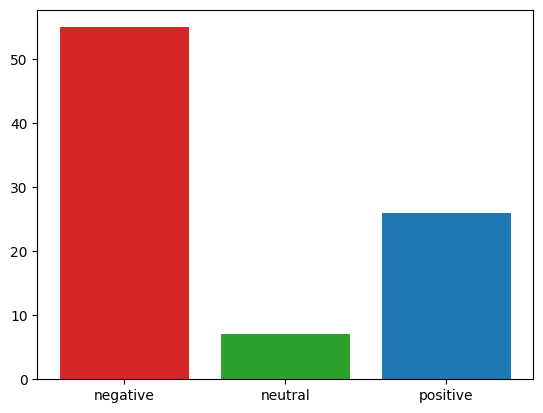

In [165]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
sentiments=['negative','neutral','positive']
counts=[len(df[df['sentiments'] == 'neutral']),len(df[df['sentiments'] == 'negative']),len(df[df['sentiments'] == 'positive'])]
bar_labels=['red','green','blue']
bar_colors=['tab:red','tab:green','tab:blue']
ax.bar(sentiments,counts,label=bar_labels,color=bar_colors)
plt.show()